# Heart disease prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb

### Loading file into Pandas DataFrame

In [2]:
df=pd.read_csv("E:/Driven data/train_values.csv")
df.set_index('patient_id',inplace=True)
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


### Importing labels and changing its shape

In [3]:
label=pd.read_csv("E:/Driven data/train_labels.csv")
test_data=pd.read_csv("E:/Driven data/test_values.csv")
test_data.set_index('patient_id',inplace=True)
label.set_index('patient_id',inplace=True)
labels=label.values
labels=labels.reshape(180,)
labels.shape

(180,)

### Analysing Data

In [4]:
df['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

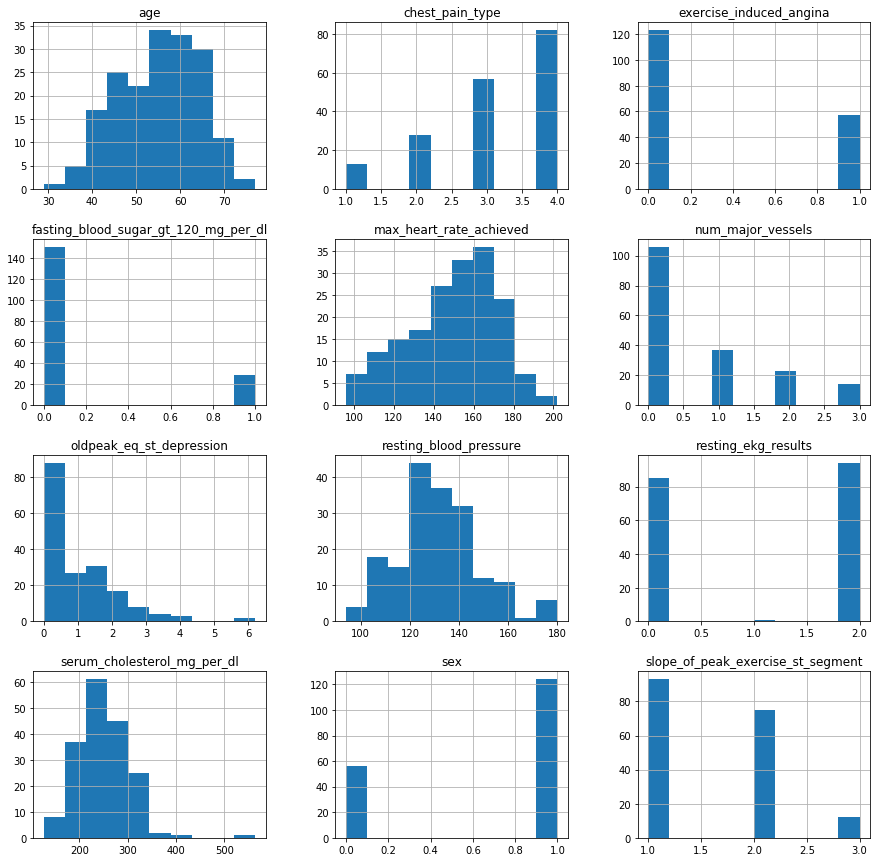

In [5]:
pd.DataFrame.hist(df, figsize=[15,15])
plt.show()

In [6]:
df.corr()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811


### Standardising Data

In [7]:
def Standardize(dataframe):
    le=LabelEncoder()
    from pandas import get_dummies
    dataframe['resting_blood_pressure']=np.log(dataframe['resting_blood_pressure'])
    dataframe['serum_cholesterol_mg_per_dl']=np.log(dataframe['serum_cholesterol_mg_per_dl'])
    dataframe['max_heart_rate_achieved']=np.log(dataframe['max_heart_rate_achieved'])
    label_dummies=get_dummies(dataframe.thal)
    label_dummies.columns=['fixed_defect','normal','reversible_defect']
    dataframe=pd.concat([dataframe,label_dummies], axis=1)
    return dataframe
df_upd=Standardize(df)

In [8]:
df_upd.drop(columns='thal',inplace=True)
df_upd.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,fixed_defect,normal,reversible_defect
patient_id,,,,,,,,,,,,,,,
0z64un,1,4.852030,2,0,0,2,5.730100,0.0,1,45,5.135798,0,0,1,0
ryoo3j,2,4.700480,3,0,0,0,5.365976,1.6,0,54,5.062595,0,0,1,0
yt1s1x,1,4.828314,4,3,0,2,5.717028,0.0,1,77,5.087596,1,0,1,0
l2xjde,1,5.023881,4,0,0,0,5.407172,0.0,1,40,5.198497,0,0,0,1
oyt4ek,3,5.181784,1,0,0,2,5.598422,4.2,1,59,4.976734,0,0,0,1


### Building ML model- RandomForest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import math
X=df_upd.values
X_train,X_test,y_train,y_test=train_test_split(X,labels,random_state=11,test_size=0.2)
forest = RandomForestClassifier(n_estimators=32,random_state=32,min_samples_split=0.1,min_samples_leaf=0.1)
forest.fit(X_train, y_train)
forest.score(X_test,y_test)
df2=Standardize(test_data)
df2.drop(columns='thal',inplace=True)
df2.info()
test_pred=forest.predict_proba(df2.values)
test_pred

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, olalu7 to aeiv0y
Data columns (total 15 columns):
slope_of_peak_exercise_st_segment       90 non-null int64
resting_blood_pressure                  90 non-null float64
chest_pain_type                         90 non-null int64
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null float64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null int64
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null float64
exercise_induced_angina                 90 non-null int64
fixed_defect                            90 non-null uint8
normal                                  90 non-null uint8
reversible_defect                       90 non-null uint8
dtypes: float64

array([[0.46321825, 0.53678175],
       [0.83728102, 0.16271898],
       [0.21303545, 0.78696455],
       [0.69570841, 0.30429159],
       [0.4288127 , 0.5711873 ],
       [0.83543794, 0.16456206],
       [0.66442266, 0.33557734],
       [0.29602703, 0.70397297],
       [0.68814967, 0.31185033],
       [0.77632028, 0.22367972],
       [0.73445352, 0.26554648],
       [0.42835207, 0.57164793],
       [0.66932477, 0.33067523],
       [0.30534804, 0.69465196],
       [0.6640524 , 0.3359476 ],
       [0.83098109, 0.16901891],
       [0.86753013, 0.13246987],
       [0.75998158, 0.24001842],
       [0.30009601, 0.69990399],
       [0.83825044, 0.16174956],
       [0.15696804, 0.84303196],
       [0.74144218, 0.25855782],
       [0.74377621, 0.25622379],
       [0.81138934, 0.18861066],
       [0.48270564, 0.51729436],
       [0.2486091 , 0.7513909 ],
       [0.45667481, 0.54332519],
       [0.65695648, 0.34304352],
       [0.57330633, 0.42669367],
       [0.82658457, 0.17341543],
       [0.

### Saving the prediction

In [29]:
res=test_pred[:,:1]
#converting to 1d array
result=re.ravel()

In [30]:
ind=test_data.index.values
sol=pd.DataFrame({'patient_id':ind,'heart_disease_present':result},columns=['patient_id','heart_disease_present'])
sol.to_csv(r'E:/Driven data/sol.csv',index=False)

### Calculating roc_auc

In [14]:
from sklearn.metrics import roc_curve, auc
y_pred = forest.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7181818181818181

### Sample Xgboost code

In [15]:
data=xgb.DMatrix(data=X_train,label=y_train)
params={'objective':'reg:logistic'}
xgboost=xgb.train(dtrain=data,params=params)
test=xgb.DMatrix(data=df2.values)
re=xgboost.predict(test)
type(test_pred)

[08:17:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[08:17:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[08:17:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[08:17:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[08:17:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[08:17:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[08:17:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

numpy.ndarray

### Finding optimised parameter for n_estimators

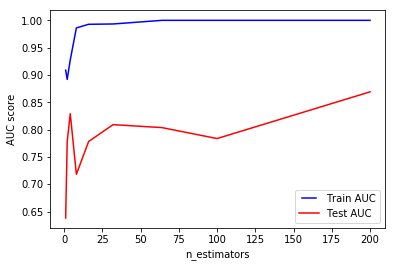

In [16]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

### Finding optimised parameter for min_samples_splits

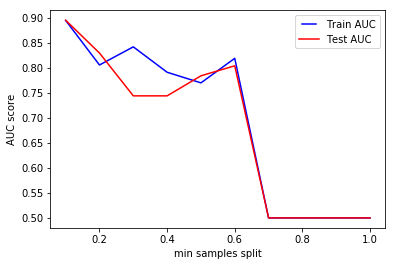

In [17]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

### Finding optimised parameter for min_samples_leafs

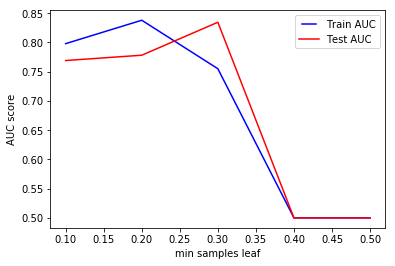

[0.1 0.2 0.3 0.4 0.5]


[0.769090909090909, 0.7781818181818182, 0.8345454545454546, 0.5, 0.5]

In [18]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()
print(min_samples_leafs)
test_results